In [1]:
import sys
sys.path.insert(0, '../scripts')
from load_data_df import *

# Data Paths

In [12]:
# AES
# aes_data_dir   = '/Users/ti27457/Repos/ttb/circuits/aes'
aes_data_dir   = '/Volumes/TI27457/ttb/circuits/aes/tjfree_50eds'

# UART
# uart_data_dir = '/Users/ti27457/Repos/ttb/circuits/uart'
uart_data_dir = '/Volumes/TI27457/ttb/circuits/uart/tjfree_16bytes'

# OR1200
# or1200_data_dir = '/Users/ti27457/Repos/ttb/circuits/or1200'
or1200_data_dir = '/Volumes/TI27457/ttb/circuits/or1200/tjfree_2tests-100000res-100ps-helloworld'

# Plot Settings

In [3]:
# Plot Settings
FIG_WIDTH             = 12
FIG_HEIGHT            = 6
HIST_SAVE_AS_PDF      = True
AES_FP_SAVE_AS_PDF    = True
UART_FP_SAVE_AS_PDF   = True
OR1200_FP_SAVE_AS_PDF = True

# Plot PDF Filenames
HIST_PDF_FILENAME      = 'cntr_sizes_histogram.pdf'
AES_FP_PDF_FILENAME    = 'aes-50tests-100res-100ps-2x.pdf'
UART_FP_PDF_FILENAME   = 'uart-1tests-10000res-100ps-2x.pdf'
OR1200_FP_PDF_FILENAME = 'or1200-1tests-100000res-100ps-helloworld-2x.pdf'

# Plot Counter Size Histogram

Histogram: [  0 344   0  40   0  22]
Bins:      [  0   8  16  32  64 128 256]
Histogram: [91 40  2  2  0  0]
Bins:      [  0   8  16  32  64 128 256]
Histogram: [214  44  12  89   2   0]
Bins:      [  0   8  16  32  64 128 256]


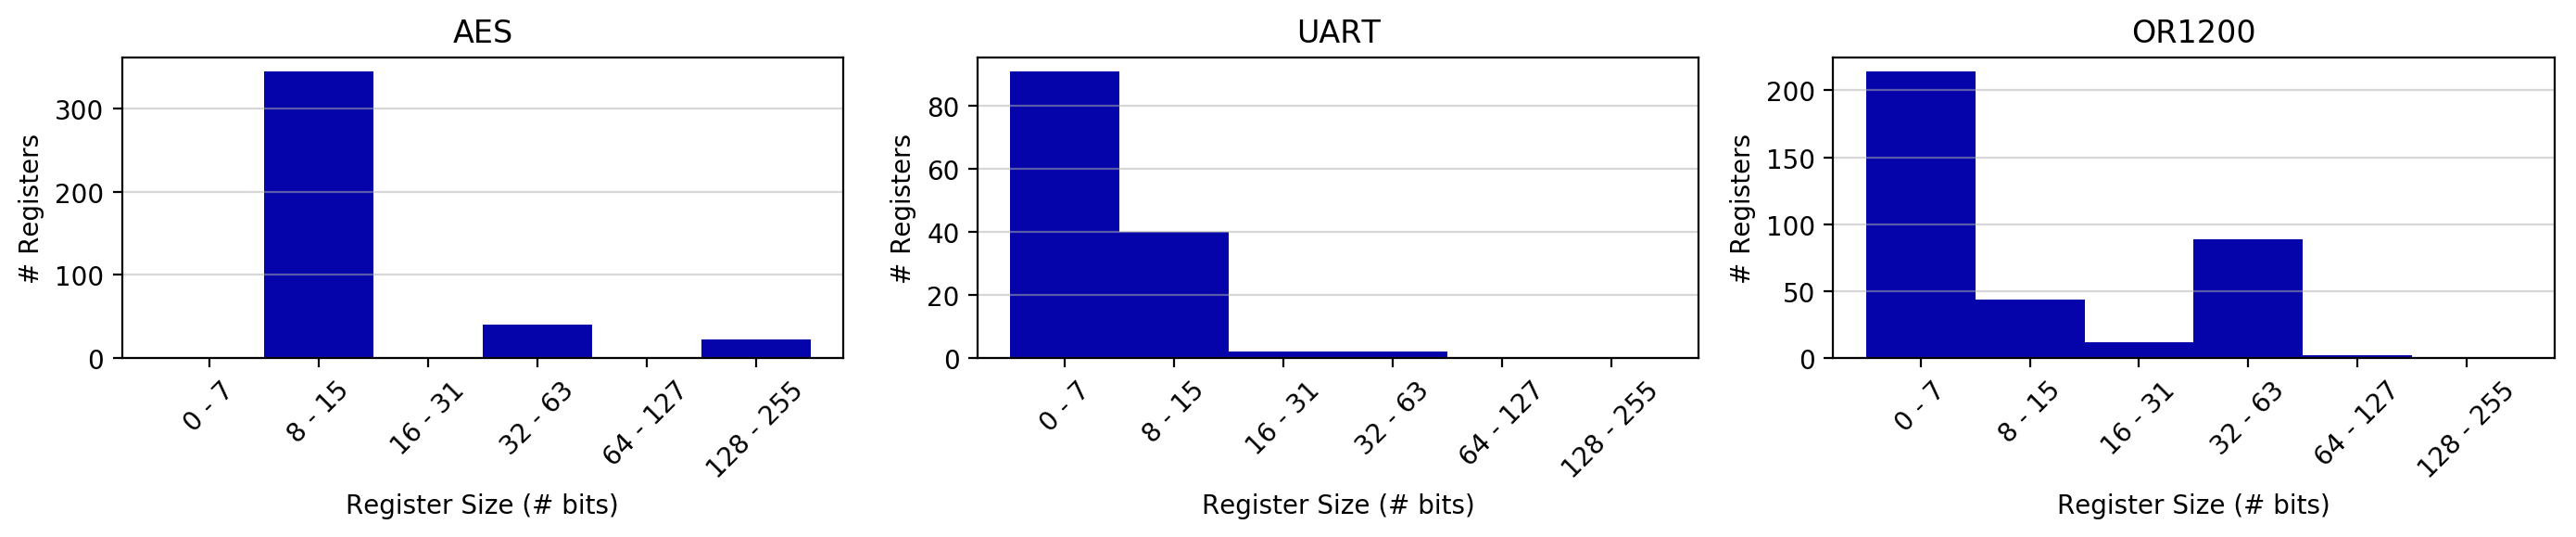

In [4]:
def plt_histogram(data, ax, title):
    bins = [0,8,16,32,64,128,256] # your bins

    # Create Histogram
    hist, bin_edges = np.histogram(data,bins) # make the histogram
    print "Histogram:", hist
    print "Bins:     ", bin_edges

    # Plot Histogram
    ax.bar(\
        range(len(hist)),\
        hist,\
        width      = 1,\
        align      = 'center',\
        tick_label = ['{} - {}'.format(bins[i], bins[i+1]-1) for i,j in enumerate(hist)],
        color      = '#0504aa')

    # Format Histogram
    ax.set_title(title)
    ax.set_xlabel('Register Size (# bits)')
    ax.set_ylabel('# Registers')
    ax.grid(axis='y', alpha=0.5)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
# Load Data
aes_counter_sizes    = load_counter_sizes(aes_data_dir)
uart_counter_sizes   = load_counter_sizes(uart_data_dir)
or1200_counter_sizes = load_counter_sizes(or1200_data_dir)

# Create Figure
fig, axes = plt.subplots(1, 3, figsize=(14, 3), dpi=200)

# AES Histogram
plt_histogram(aes_counter_sizes['Coalesced Sizes'], axes[0], 'AES')

# UART Histogram
plt_histogram(uart_counter_sizes['Coalesced Sizes'], axes[1], 'UART')

# OR1200 Histogram
plt_histogram(or1200_counter_sizes['Coalesced Sizes'], axes[2], 'OR1200')

# Save Histogram to PDF
plt.tight_layout(h_pad=1)
if HIST_SAVE_AS_PDF:
    plt.savefig(HIST_PDF_FILENAME, format='pdf')
plt.show()

# Plot AES False Positives

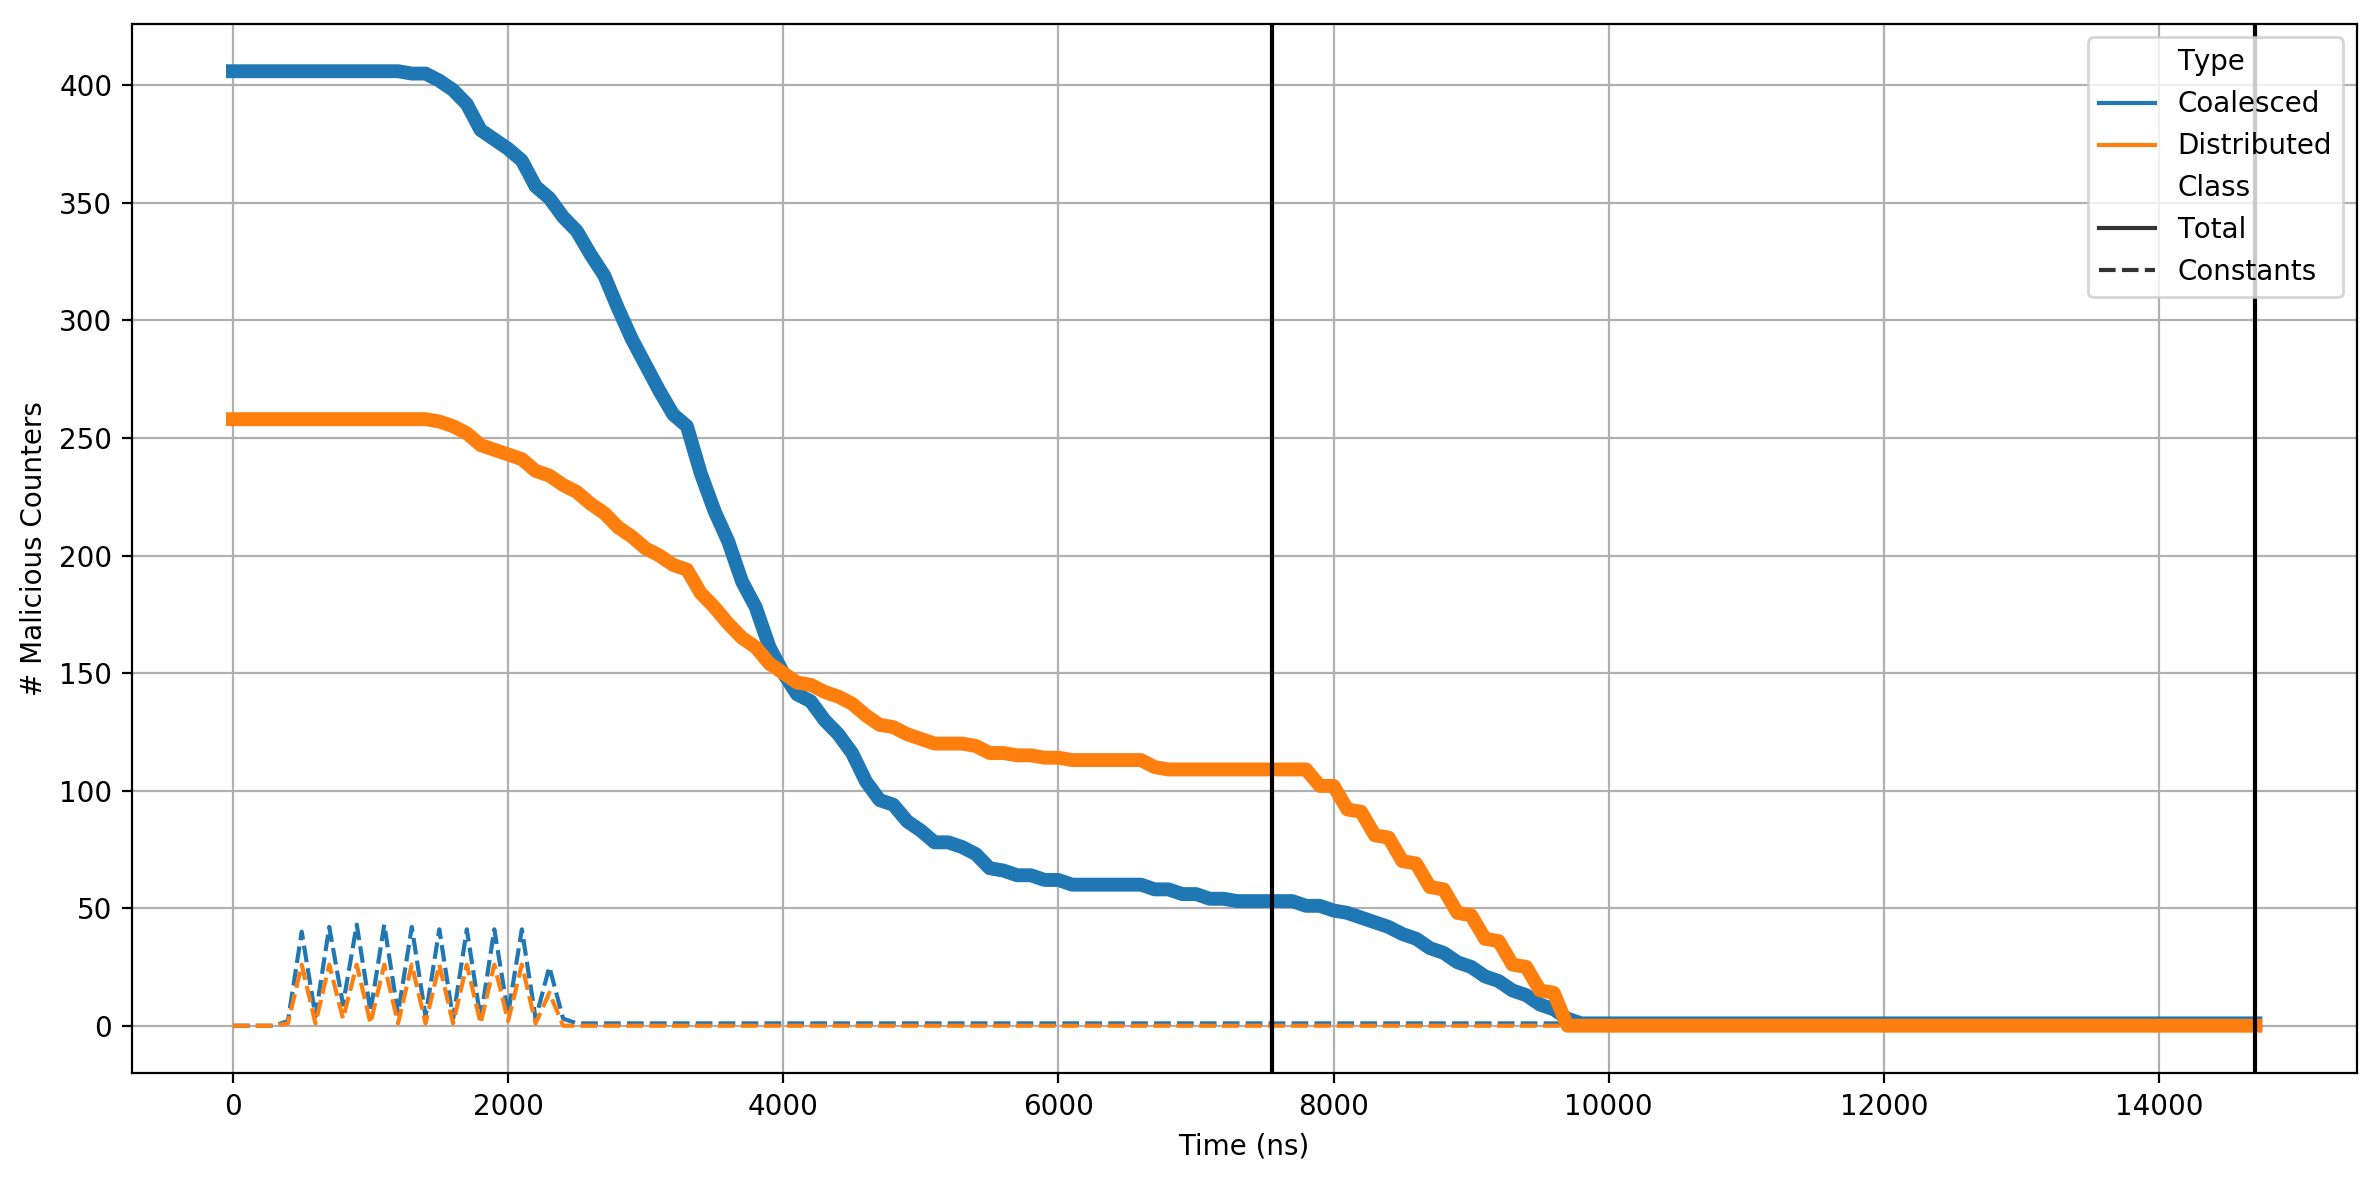

In [9]:
plot_counter_df(\
    FIG_WIDTH, \
    FIG_HEIGHT, \
    aes_data_dir, \
    line_separators=[7550, 14700], \
    save_as_pdf=AES_FP_SAVE_AS_PDF, \
    pdf_fname=AES_FP_PDF_FILENAME)

# Plot UART False Positives

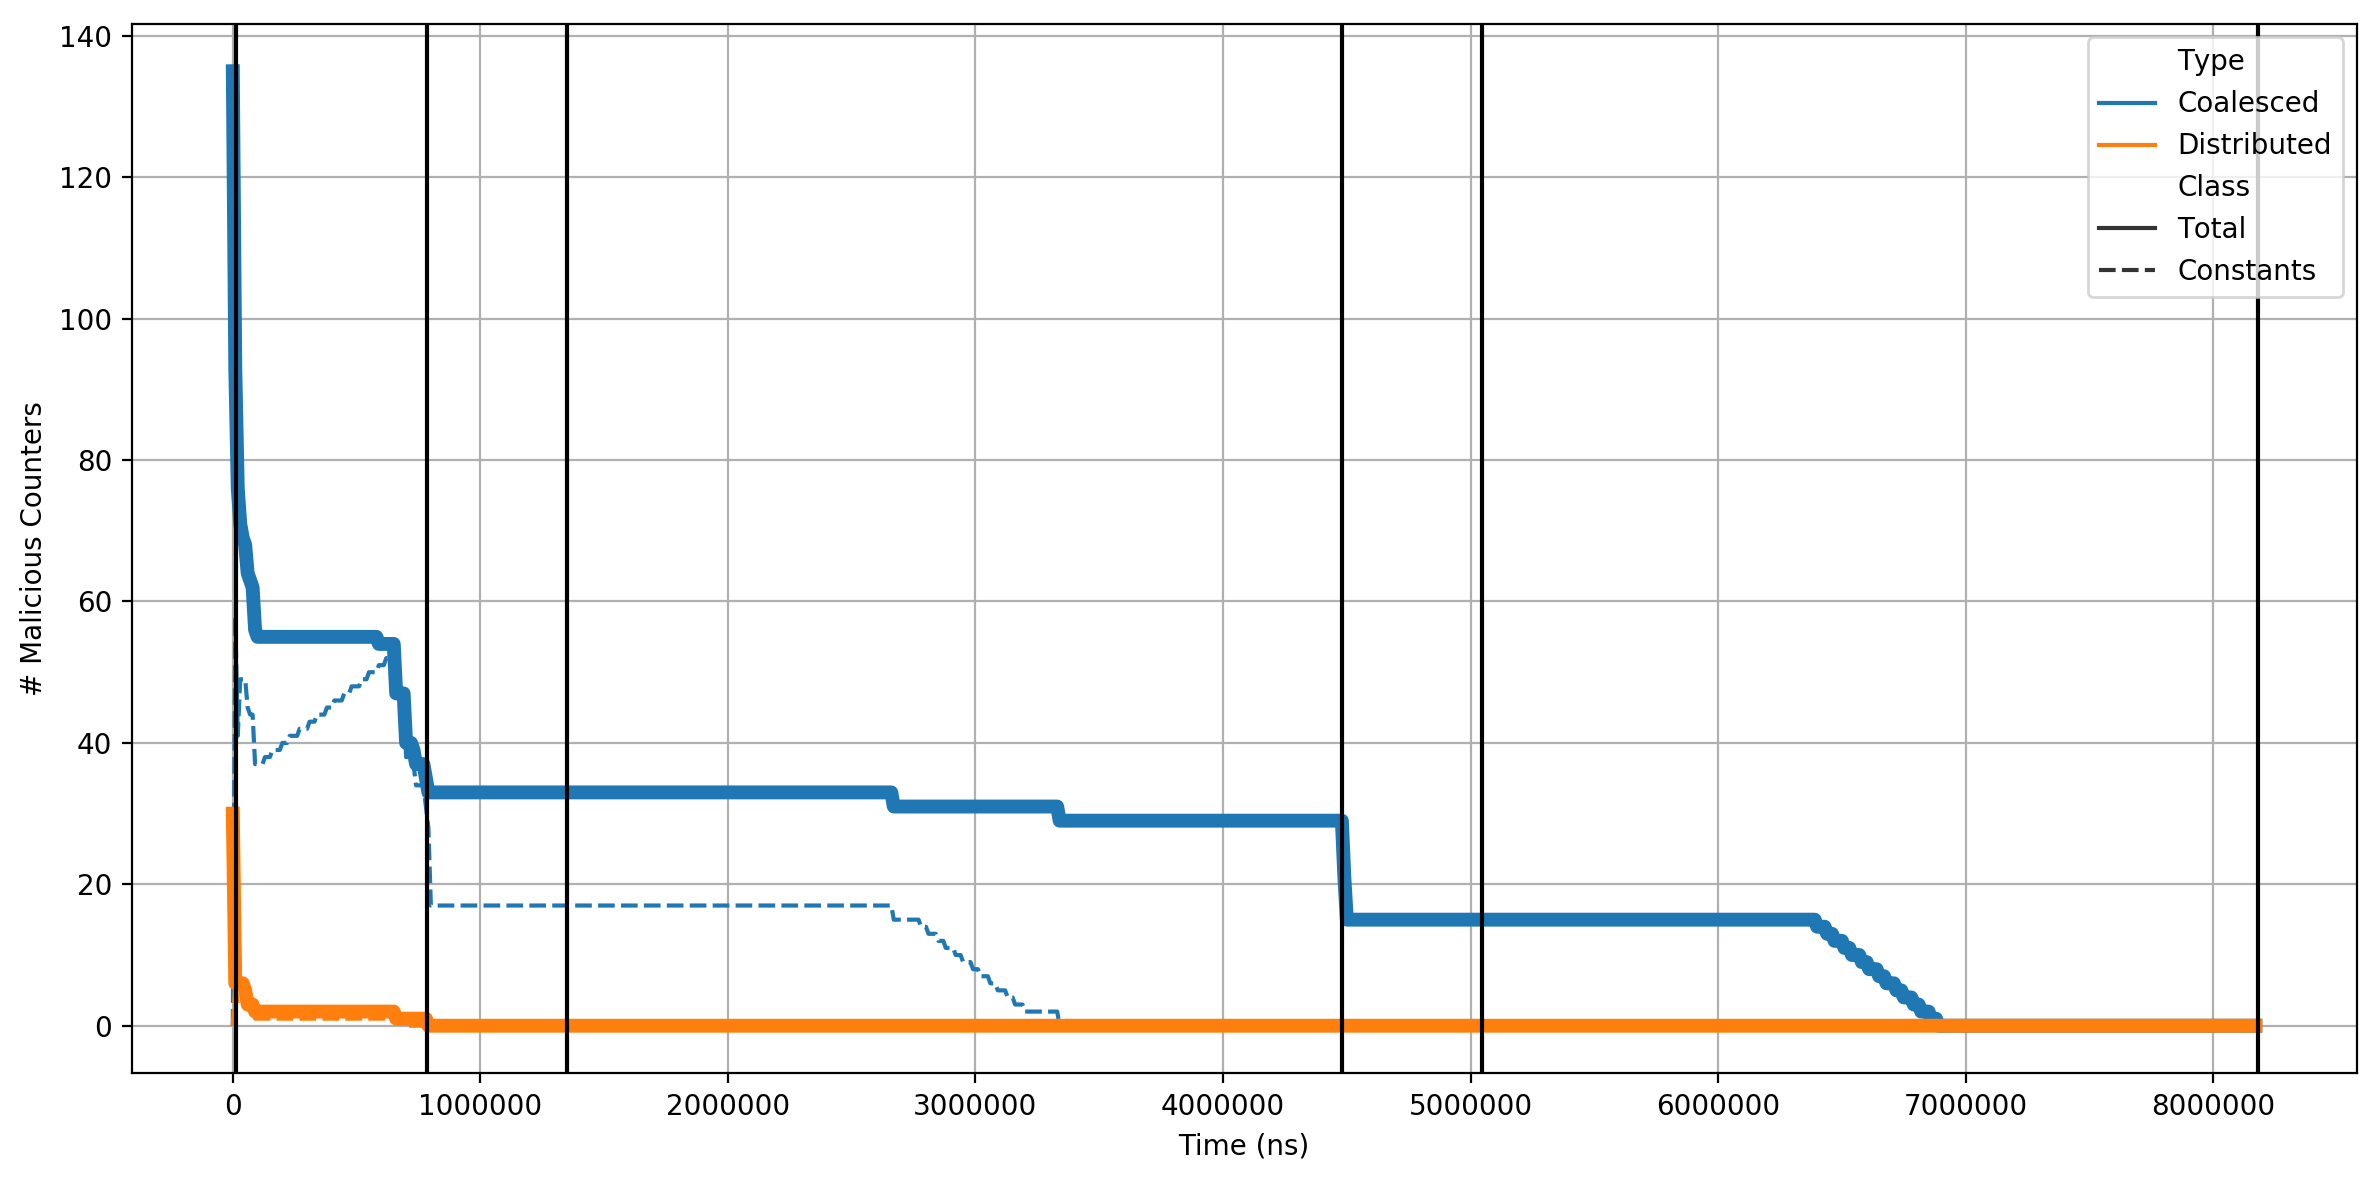

In [10]:
plot_counter_df(\
    FIG_WIDTH, \
    FIG_HEIGHT, \
    uart_data_dir, \
    line_separators=[12250, 786150, 1349660, 4482460, 5046260, 8179060], \
    save_as_pdf=UART_FP_SAVE_AS_PDF, \
    pdf_fname=UART_FP_PDF_FILENAME)

# Plot OR1200 False Positives

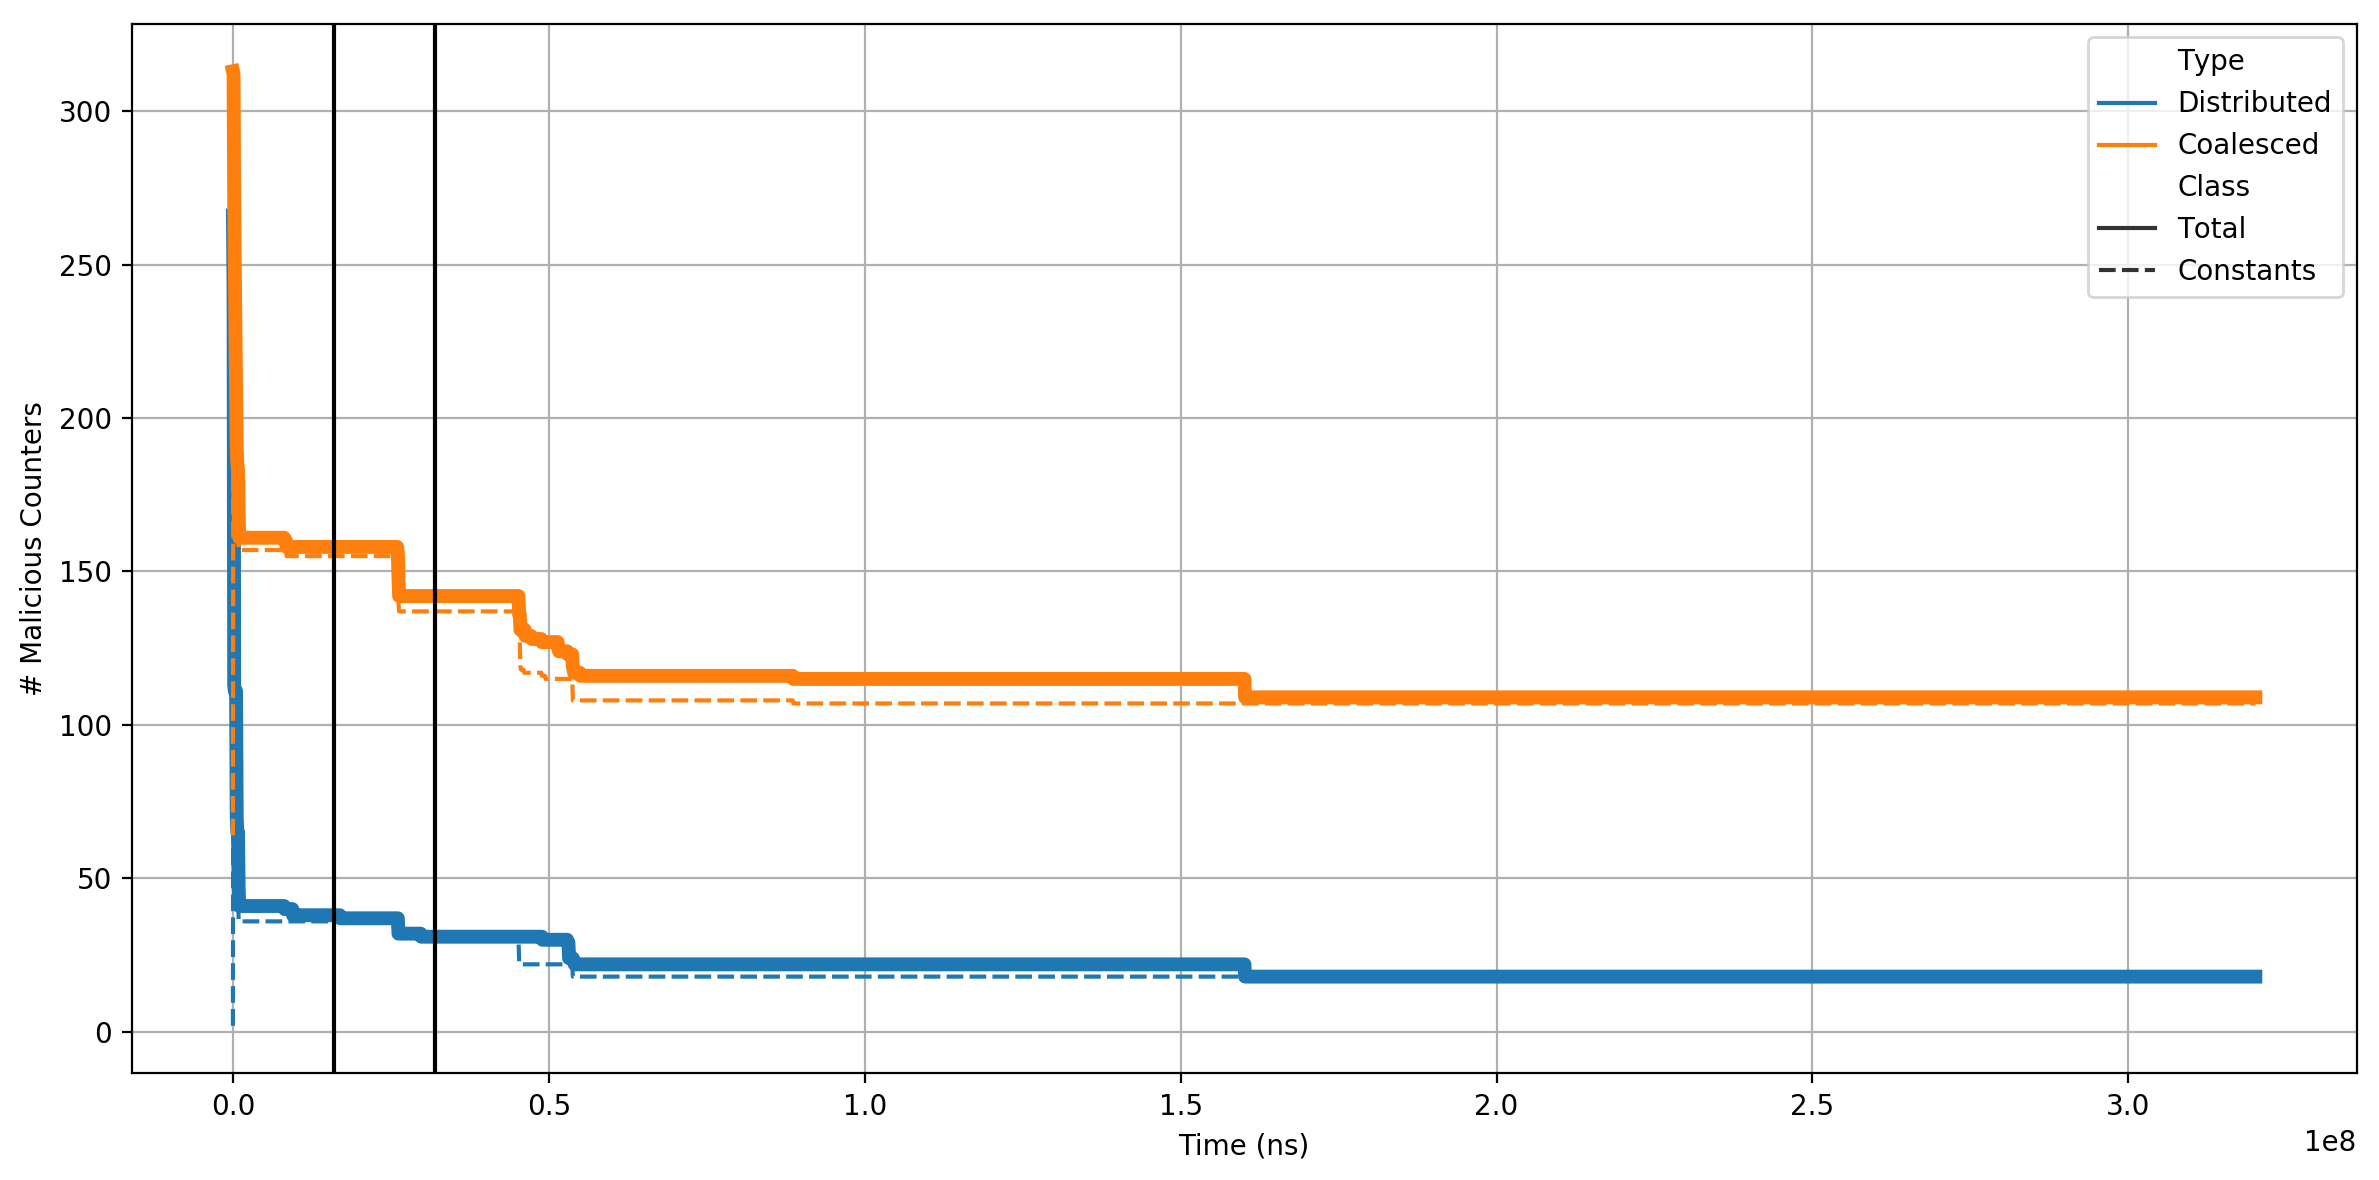

In [13]:
plot_counter_df(\
    FIG_WIDTH, \
    FIG_HEIGHT, \
    or1200_data_dir, \
    line_separators=[16009300, 32018500], \
    save_as_pdf=OR1200_FP_SAVE_AS_PDF, \
    pdf_fname=OR1200_FP_PDF_FILENAME)